# Customer Car Purchase Prediction by watching Advertisement on Social Media

Here we used Car_Purchase dataset which providing information regarding the person's age and estimated salary & if he/she is interested in buying a car  .(yes=1,No=0)
we will predict that what are the chances of new person of some age to be interested in buying car

IMPORTING NECESSARY LIBRARIES

In [ ]:



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


IMPORTING DATASET

In [ ]:
# Importing the dataset
df = pd.read_csv('Car_purchase.csv')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.shape

(400, 5)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


DESCRIPTIVE STATISTICS

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


CHECKING FOR NULL VALUES

In [ ]:
df.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of      User ID  Gender    Age  EstimatedSalary  Purchased
0      False   False  False            False      False
1      False   False  False            False      False
2      False   False  False            False      False
3      False   False  False            False      False
4      False   False  False            False      False
..       ...     ...    ...              ...        ...
395    False   False  False            False      False
396    False   False  False            False      False
397    False   False  False            False      False
398    False   False  False            False      False
399    False   False  False            False      False

[400 rows x 5 columns]>

In [ ]:
df.isnull().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

DATA VISUALIZATION

Univariate analysis

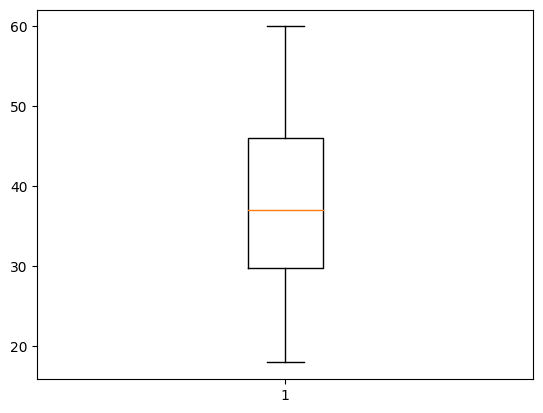

In [ ]:
q = list(df.Age)
plt.boxplot(q)
plt.show()

<ipython-input-11-cf0334540b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

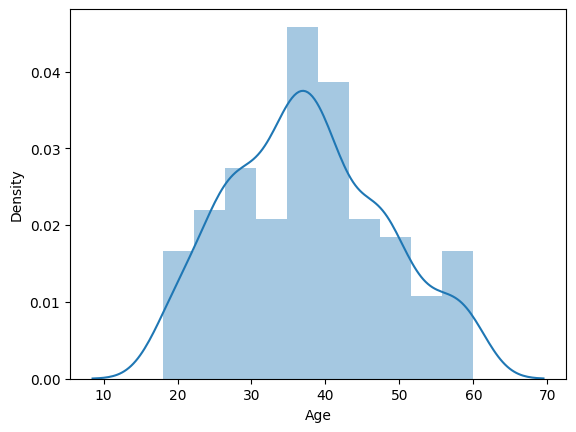

In [ ]:
sns.distplot(df["Age"])

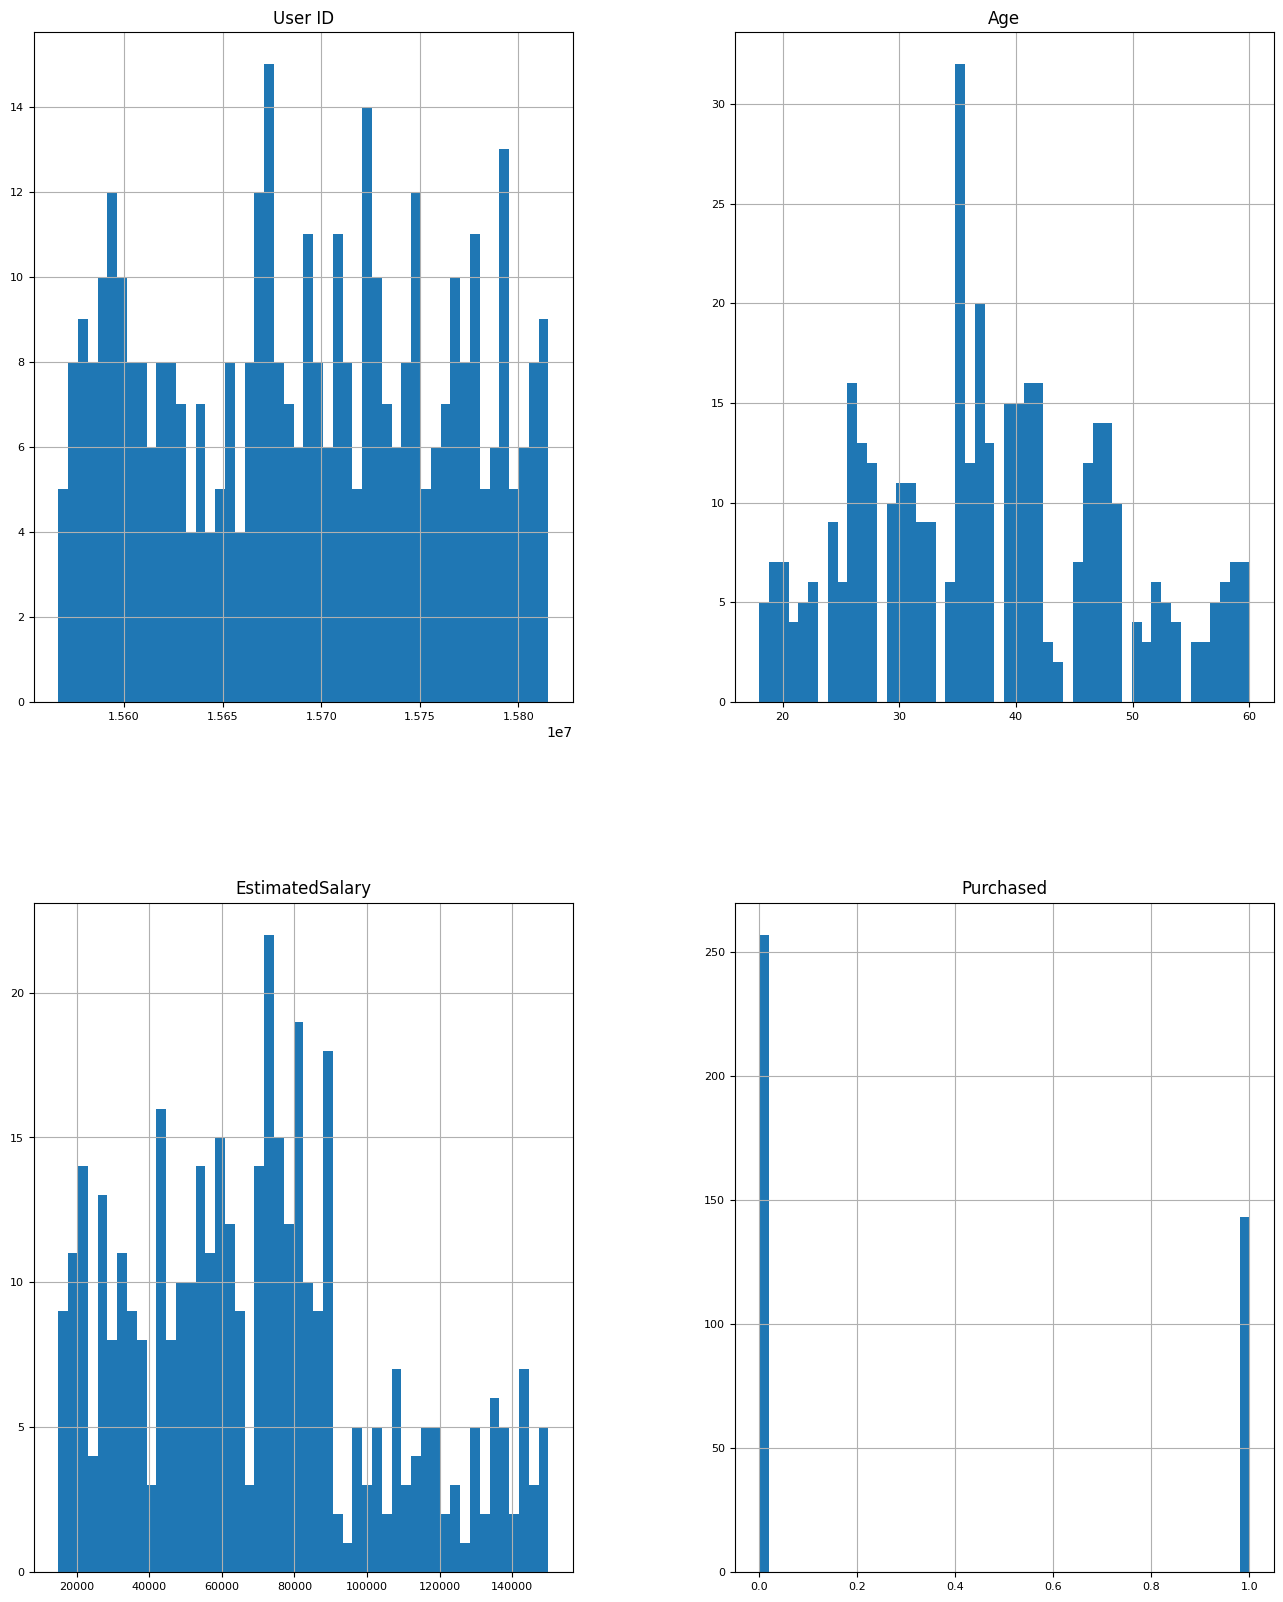

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

Bivariate analysis

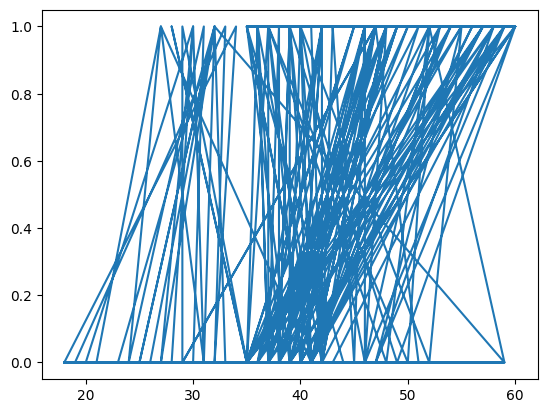

In [ ]:
plt.plot(df.Age,df.Purchased)

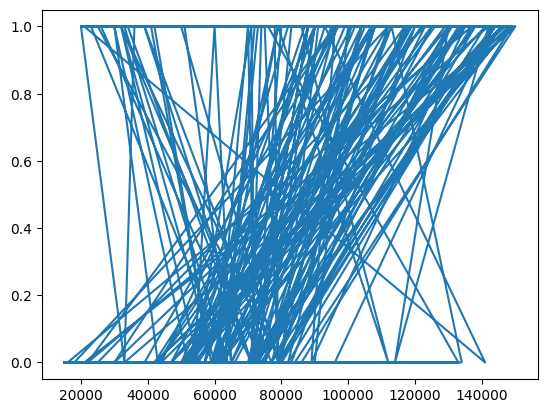

In [ ]:
plt.plot(df.EstimatedSalary,df.Purchased)

<Axes: xlabel='Age', ylabel='Purchased'>

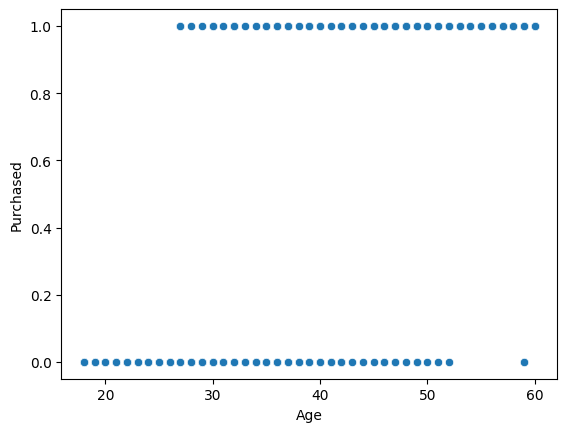

In [ ]:
#comparing two plots

sns.scatterplot(x="Age",y="Purchased",data=df)



<Axes: xlabel='EstimatedSalary', ylabel='Purchased'>

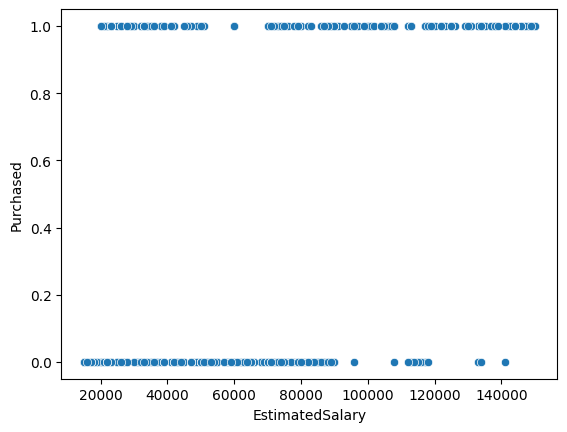

In [ ]:
sns.scatterplot(x="EstimatedSalary",y="Purchased",data=df)

<Axes: xlabel='EstimatedSalary', ylabel='Purchased'>

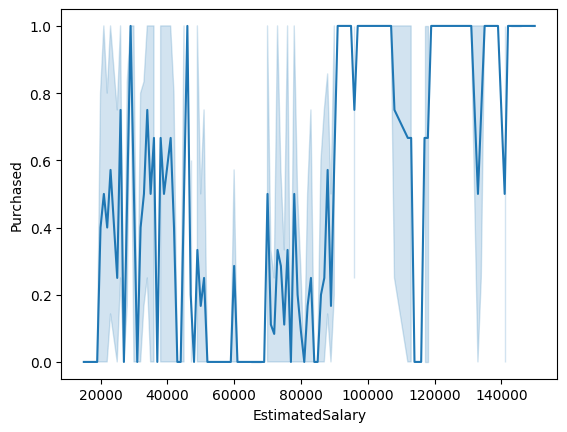

In [ ]:
sns.lineplot(x="EstimatedSalary",y="Purchased",data=df)

Multivariate analysis

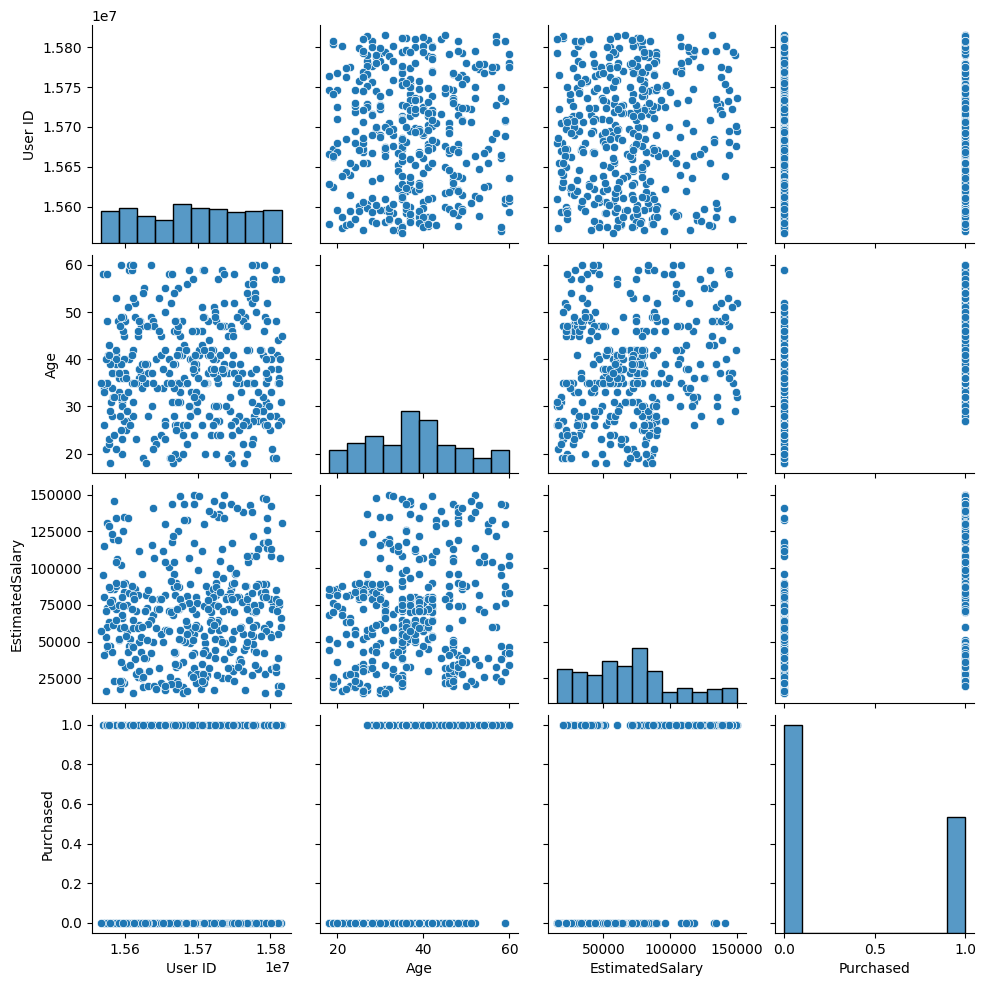

In [ ]:
sns.pairplot(df)


OUTLIER DETECTION

<Axes: >

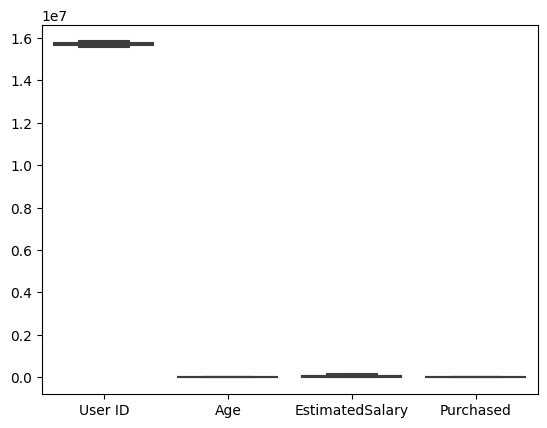

In [ ]:
sns.boxplot(df)

From the figure we come to know that there are no outliers.Hence,they need not be treated

## Splitting the Dataset into dependent and independent variables

In [ ]:
x=df.iloc[:,1:4]
x.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [ ]:
y=df.Purchased
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

ENCODING THE CATEGORICAL DATA USING LABELENCODER()





In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
x["Gender"]=le.fit_transform(x["Gender"])
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


Thus the gender feature has been encoded

FEATURE SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [ ]:
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 3) (80, 3) (320,) (80,)


MODEL BUILDING

## 1)Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [ ]:
lr.fit(x_train,y_train)


LogisticRegression()

In [ ]:
pred=lr.predict(x_test)
pred


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
#random value prediction
lr.predict(ms.transform([[1,19,19000]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

EVALUATION OF MODEL

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [ ]:
score1=accuracy_score(y_test,pred)
score1

0.925

In [ ]:
confusion_matrix(y_test,pred)

array([[58,  0],
       [ 6, 16]])

In [ ]:
pd.crosstab(y_test,pred)

col_0,0,1
Purchased,,
0,58,0
1,6,16


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



PLotting HEATMAP

In [ ]:
cm = confusion_matrix(y_test, pred)

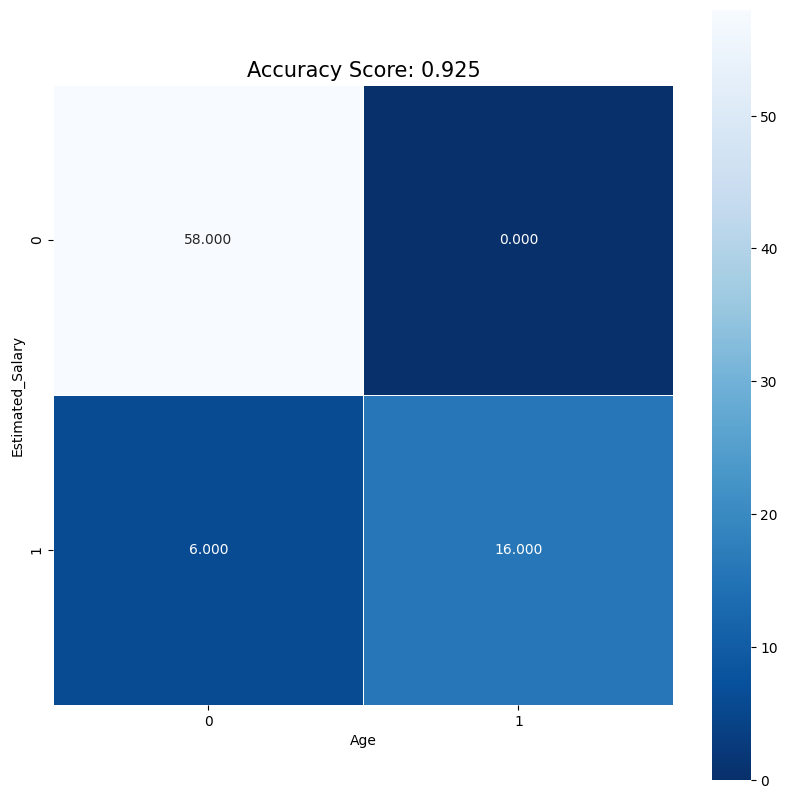

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Estimated_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score1)
plt.title(all_sample_title, size = 15);

PLOTTING ROC-AUC CURVE

In [ ]:
probability=lr.predict_proba(x_test)[:,1]#retruns the prob of being yes

In [ ]:
fpr,tpr,threshsholds=roc_curve(y_test,probability)#calculating fpr,tpr and threshshold value

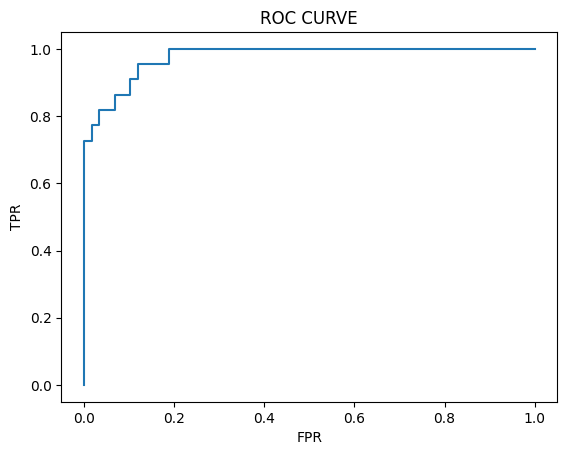

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC CURVE')
plt.show()

## 2) K_nearest neighbors[KNN]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
#random val prediction
knn.predict([[1,19,19000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

EVALUATNG THE MODEL

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
score=accuracy_score(y_pred,y_test)
score

0.95

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [ ]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Purchased,,
0,55,3
1,1,21


In [ ]:
PLOTTING HEATMAP USING CONFUSION MATRIX

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)

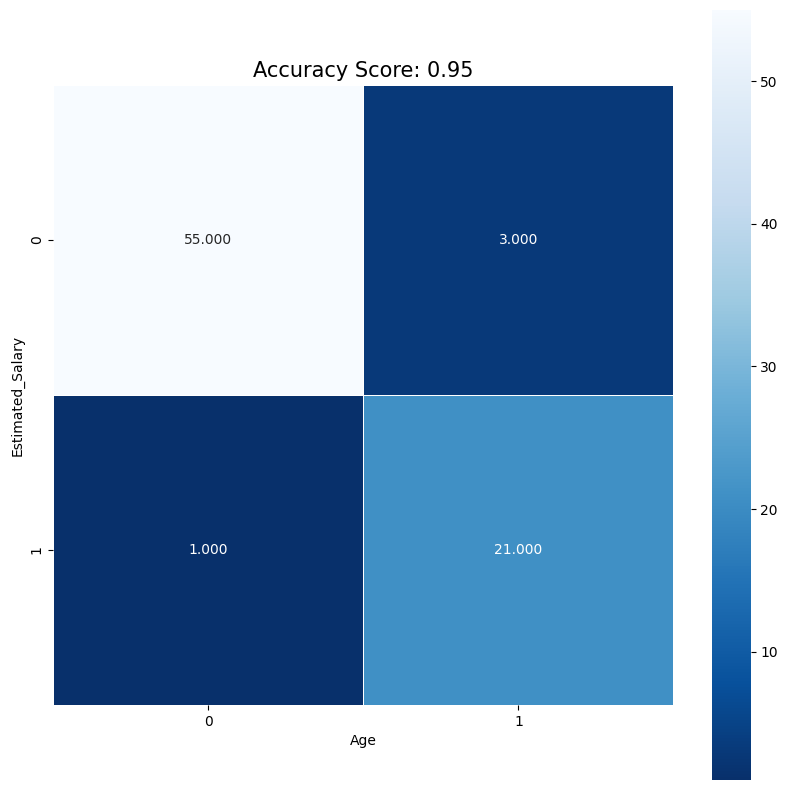

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Estimated_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

PLOTTING ROC AUC CURVE

In [ ]:
probability=knn.predict_proba(x_test)[:,1]#retruns the prob of being yes

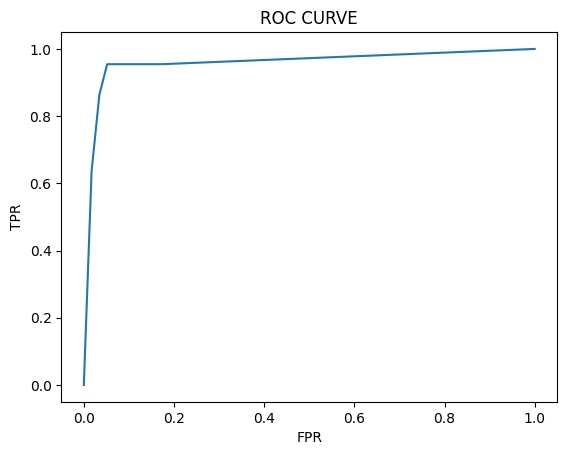

In [ ]:
fpr,tpr,threshsholds=roc_curve(y_test,probability)#calculating fpr,tpr and threshshold value
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC CURVE')
plt.show()

## 3) Decision tree classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred2=dtc.predict(x_test)
pred2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
#random value prediction
dtc.predict(ms.transform([[1,19,19000]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
score2=accuracy_score(y_test,pred2)
score2

0.925

PLOTTING HEATMAP USING THE CONFUSION MATRIX

In [ ]:
cm2 = confusion_matrix(y_test, pred2)

PLOTTING ROC-AUC CURVE

In [ ]:
probability=dtc.predict_proba(x_test)[:,1]#retruns the prob of being yes

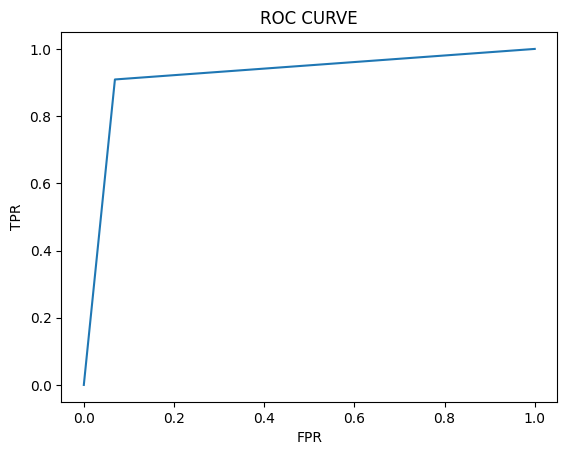

In [ ]:
fpr,tpr,threshsholds=roc_curve(y_test,probability)#calculating fpr,tpr and threshshold value
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC CURVE')
plt.show()

HYPER PARAMETER TUNING

[Text(0.4720744680851064, 0.9666666666666667, 'x[1] <= 0.631\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.26595744680851063, 0.9, 'x[2] <= 0.559\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(0.14893617021276595, 0.8333333333333334, 'x[1] <= 0.44\ngini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(0.1276595744680851, 0.7666666666666667, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.1702127659574468, 0.7666666666666667, 'x[2] <= 0.507\ngini = 0.213\nsamples = 66\nvalue = [58, 8]'),
 Text(0.14893617021276595, 0.7, 'x[2] <= 0.389\ngini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(0.1276595744680851, 0.6333333333333333, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.1702127659574468, 0.6333333333333333, 'x[2] <= 0.411\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.14893617021276595, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19148936170212766, 0.5666666666666667, 'x[1] <= 0.56\ngini = 0.278\nsamples = 30\n

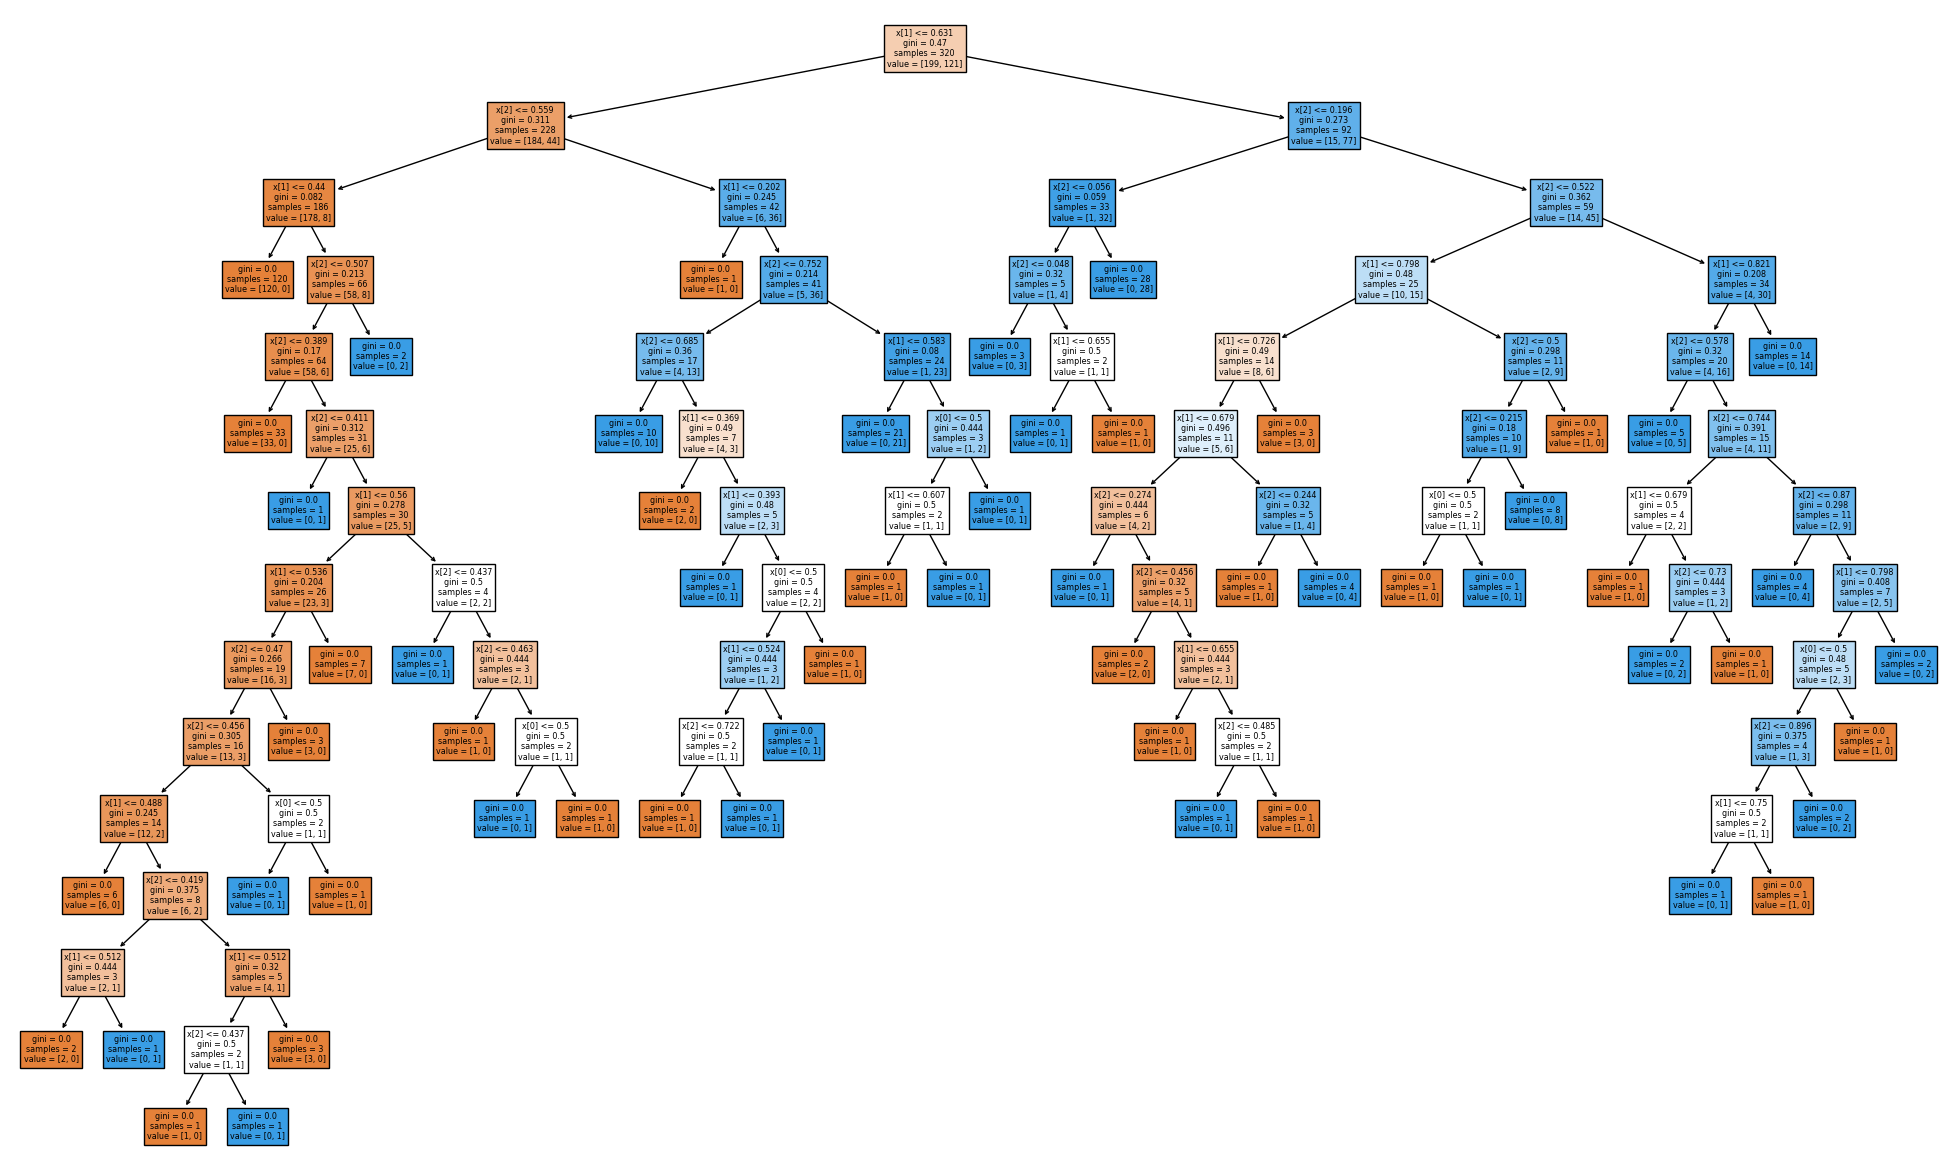

In [ ]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtc,filled=1)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter={
    'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5],'max_features':['auto','sqrt','log2']

}

In [ ]:
grid_search=GridSearchCV(estimator=dtc,param_grid=parameter,cv=5,scoring='accuracy')

In [ ]:
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [ ]:
dtc_cv=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 4,
 max_features='log2',
 splitter='best')
dtc_cv.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='log2')

In [ ]:
pred_cv=dtc_cv.predict(x_test)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



In [ ]:
score_cv=accuracy_score(y_test,pred_cv)
score_cv

0.95

HEATMAP

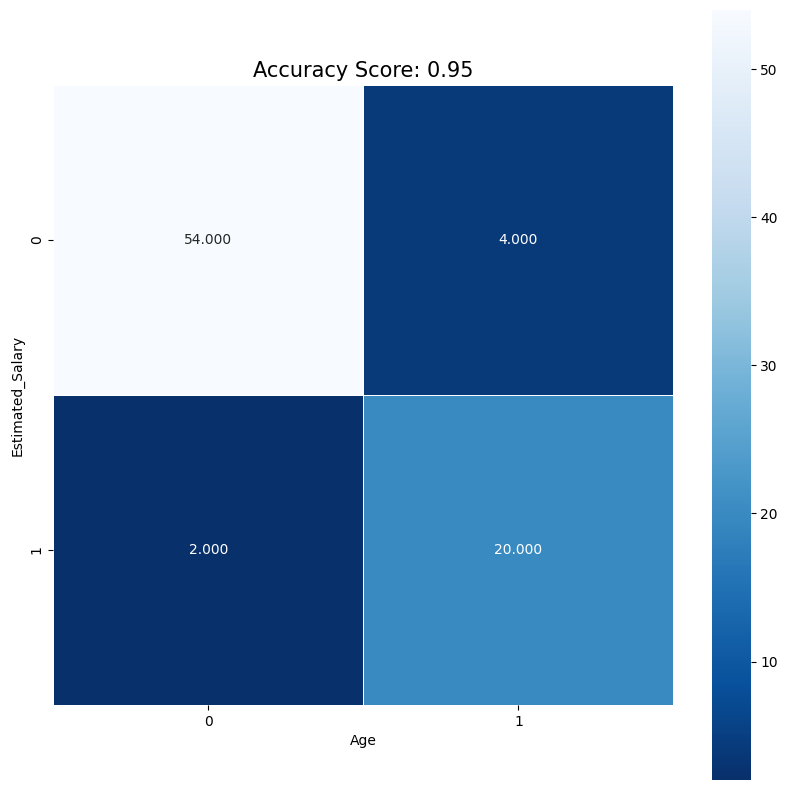

In [ ]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Estimated_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score_cv)
plt.title(all_sample_title, size = 15);

ROC-AUC CURVE

In [ ]:
probability=dtc_cv.predict_proba(x_test)[:,1]#retruns the prob of being yes

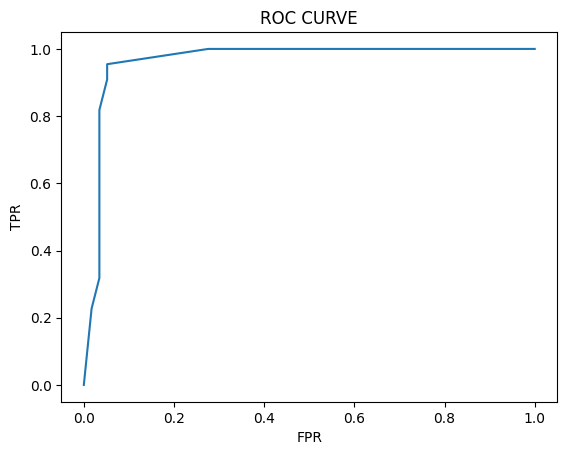

In [ ]:
fpr,tpr,threshsholds=roc_curve(y_test,probability)#calculating fpr,tpr and threshshold value
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC CURVE')
plt.show()

## 4) random forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [ ]:
forest_params=[{'max_depth':list(range(10,15)),'max_features':list(range(0,14))}]


In [ ]:
rfc_cv=GridSearchCV(rfc,param_grid=forest_params,cv=10,scoring='accuracy')

In [ ]:
rfc_cv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [ ]:
pred3=rfc_cv.predict(x_test)

In [ ]:
# print(classification_report(y_test,pred))

In [ ]:
score4=accuracy_score(y_test,pred3)
score4

0.925

In [ ]:
cm3 = confusion_matrix(y_test, pred3)

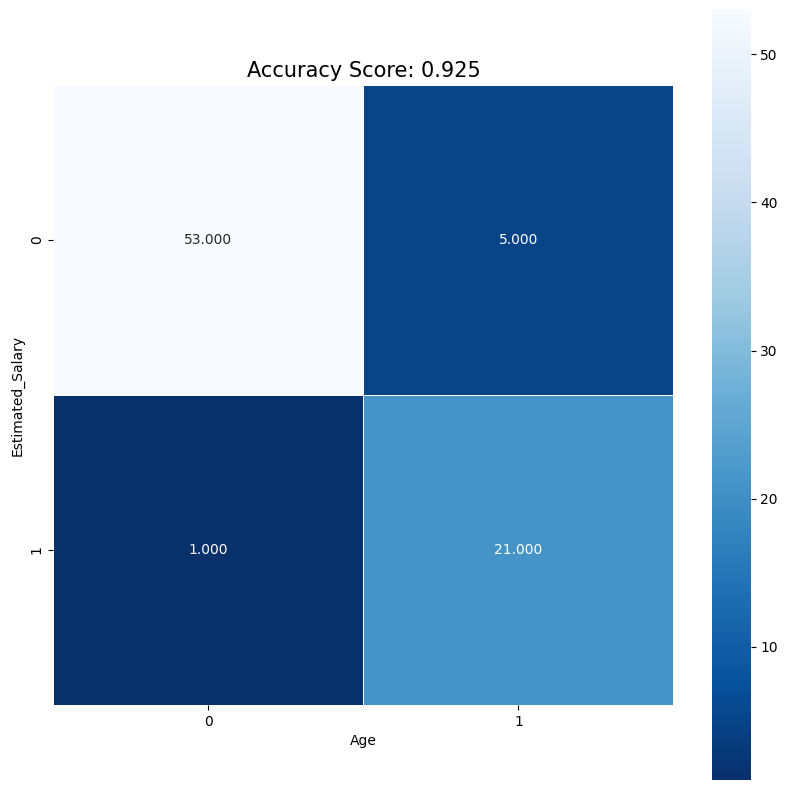

In [ ]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Estimated_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score4)
plt.title(all_sample_title, size = 15);


In [ ]:
probability=rfc_cv.predict_proba(x_test)[:,1]#retruns the prob of being yes

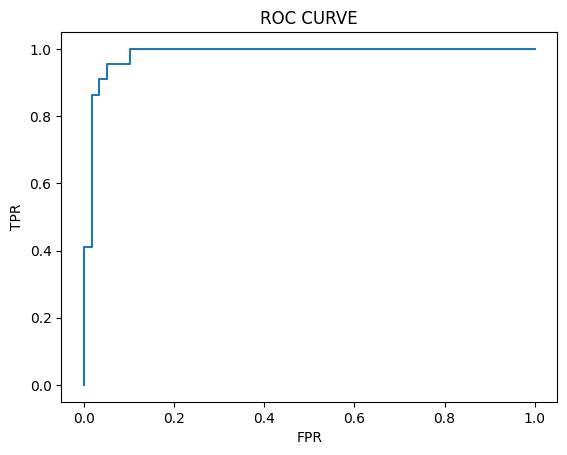

In [ ]:
fpr,tpr,threshsholds=roc_curve(y_test,probability)#calculating fpr,tpr and threshshold value
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC CURVE')
plt.show()

## 5) Support Vector Machine (SVM) classification

In [ ]:
from sklearn.svm import SVC
model=SVC(probability=True)


In [ ]:
rand_list={"C":[2,3,4,5,7,8,10],"gamma":[0.1,0.2,0.3,0.5,0.6,0.8]}#c  values tells us about how the hyperplane is created
#if c is less then low hyperplane is created.if c is high error is high
#gamma value tells us how loosly the training data is fitted into the model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rand_search=RandomizedSearchCV(model,param_distributions=rand_list,n_iter=20,cv=5)

In [ ]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_iter=20,
                   param_distributions={'C': [2, 3, 4, 5, 7, 8, 10],
                                        'gamma': [0.1, 0.2, 0.3, 0.5, 0.6,
                                                  0.8]})

In [ ]:
pred5=rand_search.predict(x_test)
pred5


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
rand_search.predict(ms.transform([[1,19,19000]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
score5=accuracy_score(y_test,pred5)
score5

0.95

In [ ]:
cm4 = confusion_matrix(y_test, pred5)

In [ ]:
print(cm4)

[[56  2]
 [ 2 20]]


In [ ]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.91      0.91      0.91        22

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



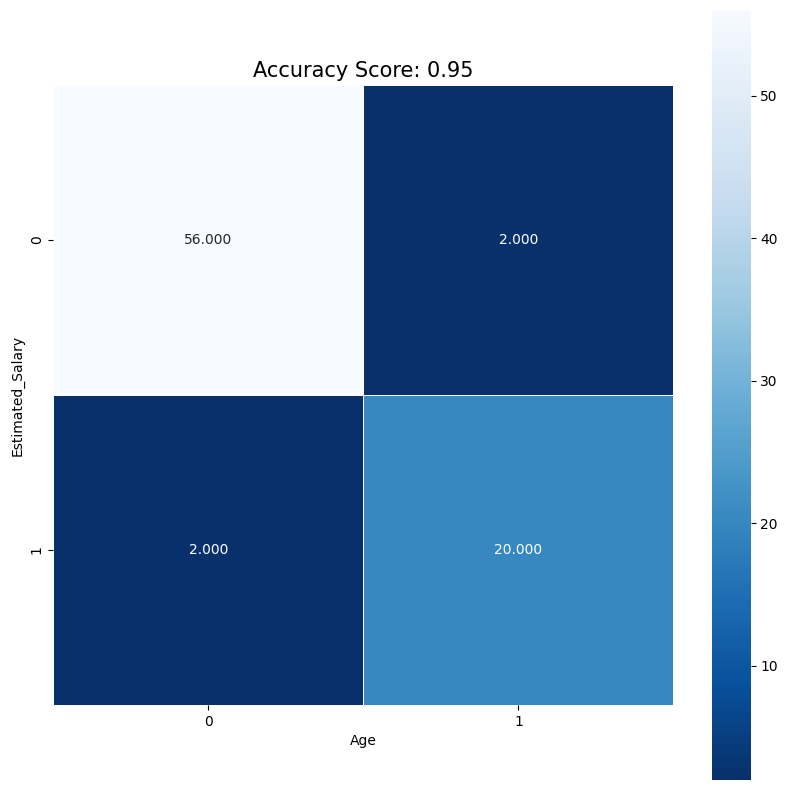

In [ ]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm4, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Estimated_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score5)
plt.title(all_sample_title, size = 15);

In [ ]:
probability=rand_search.predict_proba(x_test)[:,1]#retruns the prob of being yes

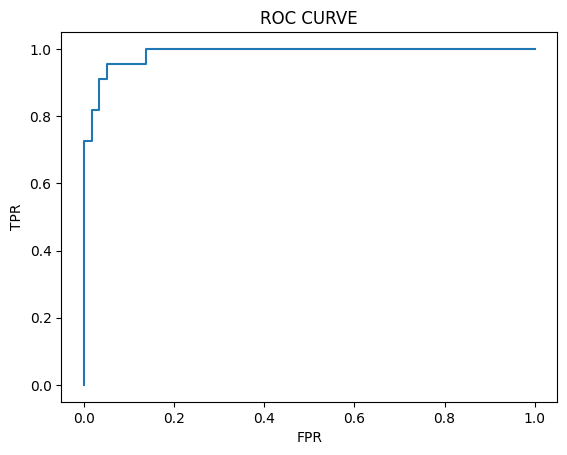

In [ ]:
fpr,tpr,threshsholds=roc_curve(y_test,probability)#calculating fpr,tpr and threshshold value
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC CURVE')
plt.show()

## 6) Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
pred6=nb.predict(x_test)
pred6

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
#random value prediction
nb.predict(ms.transform([[1,19,19000]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
cm6 = confusion_matrix(y_test, pred6)

In [ ]:
print(cm6)

[[56  2]
 [ 4 18]]


In [ ]:
score7=accuracy_score(y_test,pred6)
score7

0.925

In [ ]:
pd.crosstab(y_test,pred)

col_0,0,1
Purchased,,
0,58,0
1,6,16


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



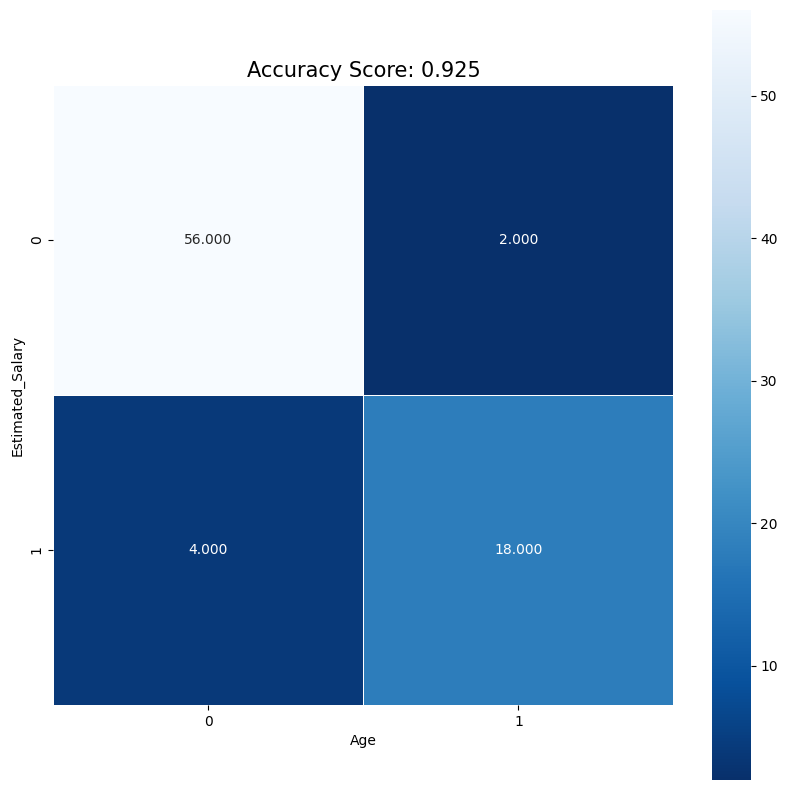

In [ ]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Estimated_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score7)
plt.title(all_sample_title, size = 15);


In [ ]:
probability=nb.predict_proba(x_test)[:,1]#retruns the prob of being yes
fpr,tpr,threshsholds=roc_curve(y_test,probability)#calculating fpr,tpr and threshshold valu

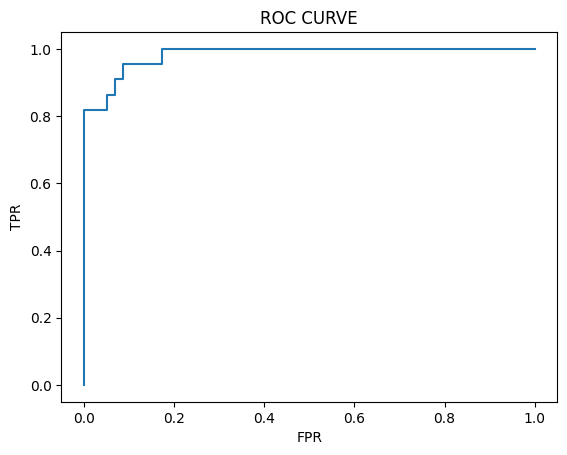

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC CURVE')
plt.show()

## Inference

Among all implemented algorithms , Support Vector Machine(SVC) , KNN and Decision Tree Classifier perform well on Car Purchase Dataset .
Accuracy of KNN,SVM and DTC : 95%